<a href="https://colab.research.google.com/github/youngnamh/PyTorch/blob/main/benchmark_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STT Engine Benchmark Report

After narrowing down the list of STT engines to 8, I performed some testing to calculate both the accuracy of each engine and their speed.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:

import pandas as pd
import matplotlib.pyplot as plt

benchmark_data = pd.read_csv('/content/drive/MyDrive/Curioson-personal/week1/benchmark-filled.csv')

In [7]:
benchmark_data[:5]

,name,exeTime1,exeTime2,aveTime,dirtyWER,cleanWER,hasDiarization,minPrice,hasChinese,live
0,amazon transcribe,35.0,48.0,6.783747,17.7,3.0,1,0.54,1,1
1,speechMatics,22.0,95.0,5.752328,16.5,2.6,1,1.35,1,1
2,picovoice leopard,14.3,76.0,4.066148,34.0,6.4,1,0.10,0,1
3,Rev.Ai,20.0,70.0,4.853732,16.0,3.3,1,1.20,1,1
4,Google,42.0,221.0,11.891644,33.7,10.1,1,0.45,1,1


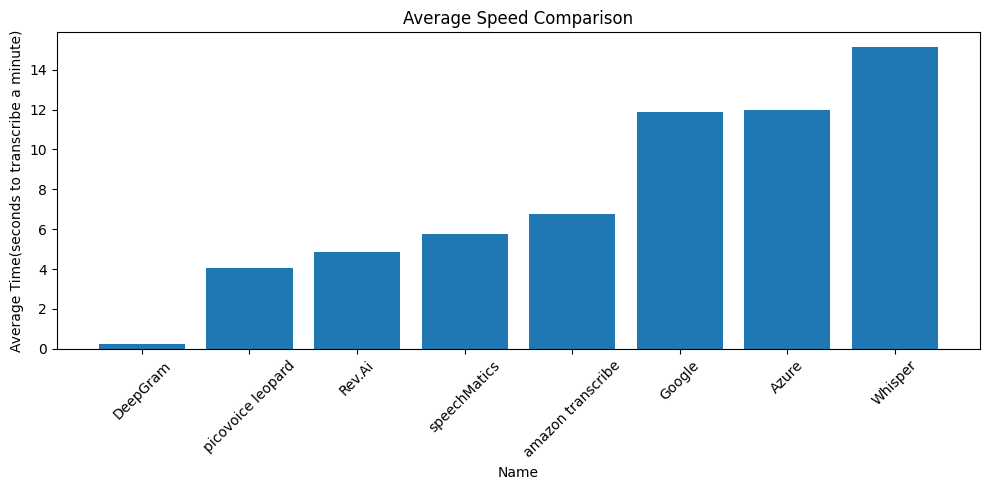

In [18]:
timeSorted = benchmark_data.sort_values(by='aveTime')
plt.figure(figsize=(10,5))
plt.bar(timeSorted['name'], timeSorted['aveTime'])
plt.xlabel('Name')
plt.ylabel('Average Time(seconds to transcribe a minute)')
plt.title('Average Speed Comparison')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the chart
plt.show()

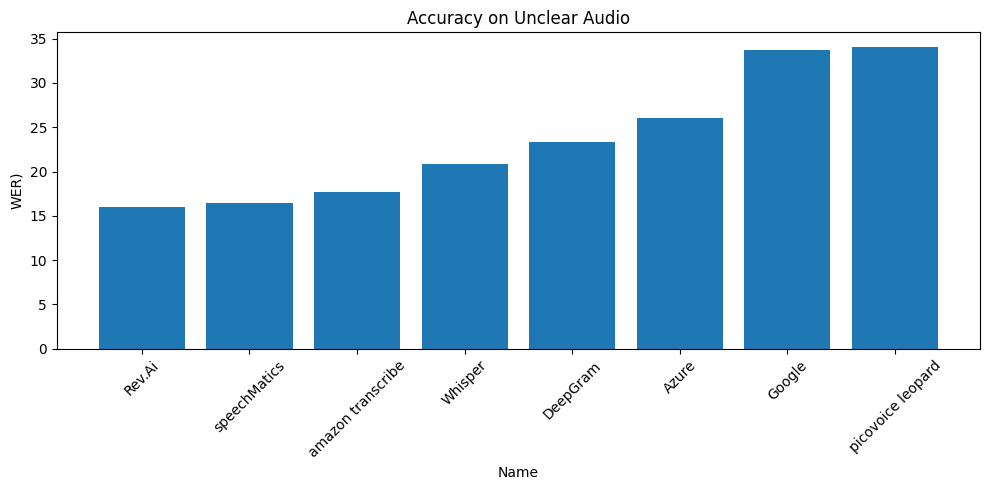

In [17]:
dirtySorted = benchmark_data.sort_values(by='dirtyWER')
plt.figure(figsize=(10,5))
plt.bar(dirtySorted['name'], dirtySorted['dirtyWER'])
plt.xlabel('Name')
plt.ylabel('WER)')
plt.title('Accuracy on Unclear Audio')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the chart
plt.show()

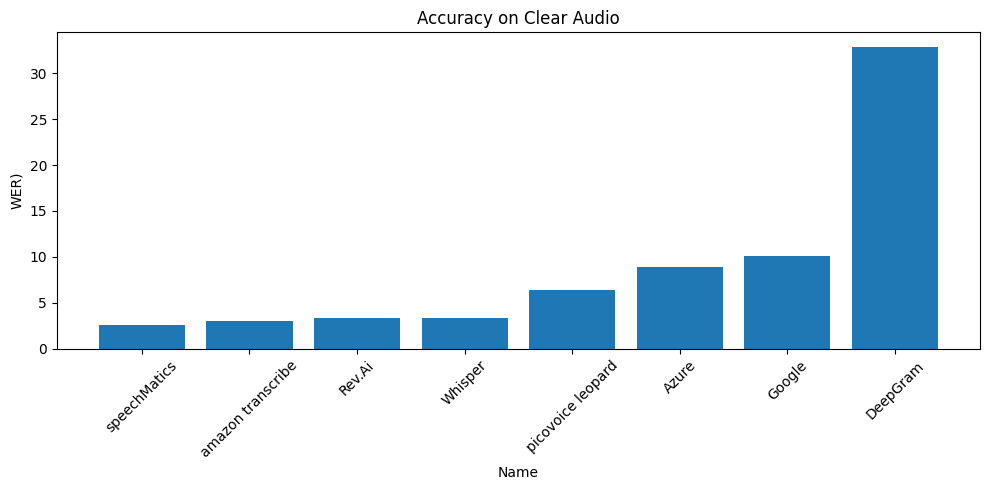

In [16]:
cleanSorted = benchmark_data.sort_values(by='cleanWER')
plt.figure(figsize=(10,5))
plt.bar(cleanSorted['name'], cleanSorted['cleanWER'])
plt.xlabel('Name')
plt.ylabel('WER)')
plt.title('Accuracy on Clear Audio')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the chart
plt.show()

# Top Choices

The top 4 in accuracy are the same in clear and unclear audio. SpeechMatics, AWS, Rev.AI, and Whisper. However, Whisper is missing some key features such as Speech Diarization and reliable streaming speech to text. Thus, I think the top 3 to test more would be speechMatics, AWS and Rev.AI.  

# Features

Speech diarization
Different dialects

# Language

All models support English and French, only picovoice can't support Chinese.

# Price

the prices vary greatly depending on how much the models are used. Also, almost all of the models have some sort of business pricing that would be negotiable. Thus, it is hard to get an accurate representation of the actual price. Though speechMatics and Rev.AI are the most expensive, that would be the most expensive possible price, and business pricing is available for both of them.

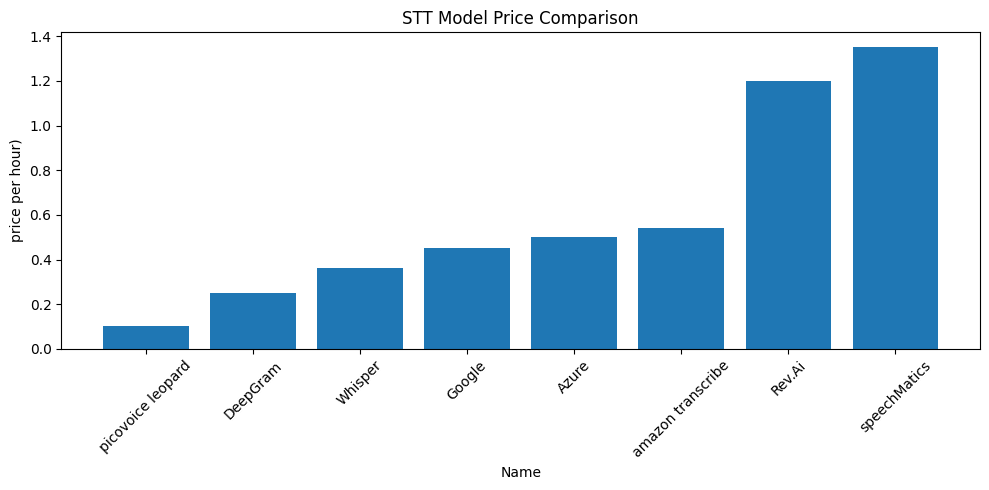

In [19]:
priceSorted = benchmark_data.sort_values(by='minPrice')
plt.figure(figsize=(10,5))
plt.bar(priceSorted['name'], priceSorted['minPrice'])
plt.xlabel('Name')
plt.ylabel('price per hour)')
plt.title('STT Model Price Comparison')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the chart
plt.show()

# More Testing Necessary

The graphs I depicted are not incredibly accurate. I tested them on about 30 minutes of audio but the varience in results between audio files was high. I need to test the top options with significantly more audio in order to get a better idea on which are the best for different types of audio.

I also did not test the models on audio from people with strong accents. Especially in Canada and the USA, there are so many different accents, I want to try finding audio data from many different accents. However, this data can be hard to find, I will either have to manually go through the hours of audio files I have accumulated, or do the transcriptions myself.